In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data.shape

(200, 4)

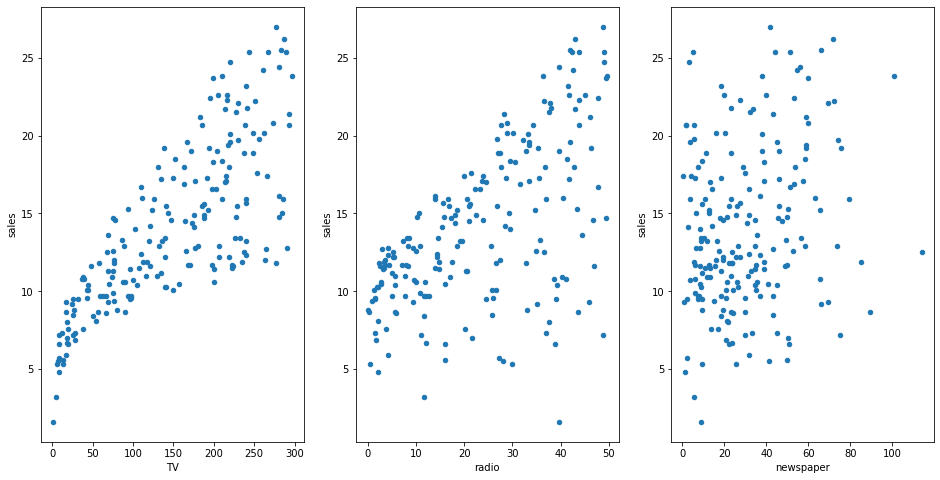

In [5]:
fig, axs = plt.subplots(1, 3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

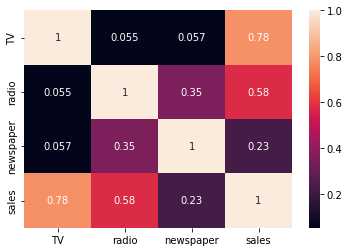

In [10]:
sns.heatmap(data.corr(), annot = True);

In [11]:
features = data[['TV', 'newspaper', 'radio']]
target = data[['sales']].values

Convert Features to Polynomial features

In [12]:

features_poly = PolynomialFeatures(degree=2)

TV_poly = features_poly.fit_transform(features[['TV']])
newspaper_poly = features_poly.fit_transform(features[['newspaper']])
radio_poly = features_poly.fit_transform(features[['radio']])

In [13]:
poly_features = pd.concat([pd.DataFrame(TV_poly),pd.DataFrame(newspaper_poly), pd.DataFrame(radio_poly)], axis = 1)

In [14]:
poly_features

,0,1,2,0,1,2,0,1,2
0,1.0,230.1,52946.01,1.0,69.2,4788.64,1.0,37.8,1428.84
1,1.0,44.5,1980.25,1.0,45.1,2034.01,1.0,39.3,1544.49
2,1.0,17.2,295.84,1.0,69.3,4802.49,1.0,45.9,2106.81
3,1.0,151.5,22952.25,1.0,58.5,3422.25,1.0,41.3,1705.69
4,1.0,180.8,32688.64,1.0,58.4,3410.56,1.0,10.8,116.64
...,...,...,...,...,...,...,...,...,...
195,1.0,38.2,1459.24,1.0,13.8,190.44,1.0,3.7,13.69
196,1.0,94.2,8873.64,1.0,8.1,65.61,1.0,4.9,24.01
197,1.0,177.0,31329.00,1.0,6.4,40.96,1.0,9.3,86.49
198,1.0,283.6,80428.96,1.0,66.2,4382.44,1.0,42.0,1764.00


In [6]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, random_state = 6)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [7]:
from sklearn.linear_model import LinearRegression

In [ ]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

#### Prediction and Evaluation on Train Data

In [ ]:
preds_train = my_model.predict(X_train)
print('MAE : ', mean_absolute_error(y_train, preds_train))
print('MSE : ', mean_squared_error(y_train, preds_train))
print('R2 Score : ', my_model.score(X_train, y_train))

#### Prediction and Evaluation on Test Data

In [ ]:
preds = my_model.predict(X_test)
print('MAE : ', mean_absolute_error(y_test, preds))
print('MSE : ', mean_squared_error(y_test, preds))
print('R2 score : ', my_model.score(X_test, y_test)) 

In [2]:
m=100
X= 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

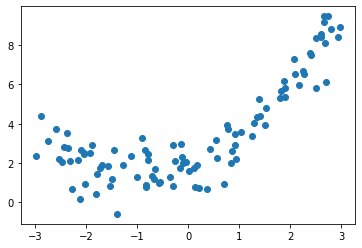

In [3]:
plt.scatter(X,y)

In [18]:
def learning_curves(model, X,y):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)
    train_errors, test_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", label = 'train')
    plt.plot(np.sqrt(test_errors), "b-", label = 'test')
    plt.xlabel('Number of instances')
    plt.ylabel('Error')
    

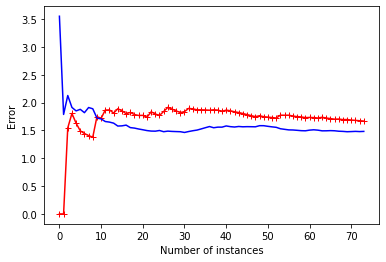

In [19]:
my_lin_reg = LinearRegression()
learning_curves(my_lin_reg, X, y)

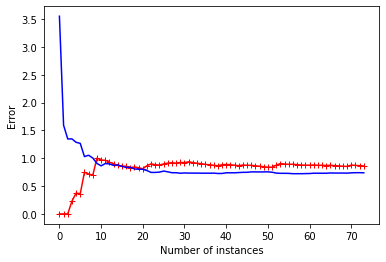

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=2)),
                     ('lin_reg', LinearRegression()),
                     ])

learning_curves(polynomial_regression, X, y)

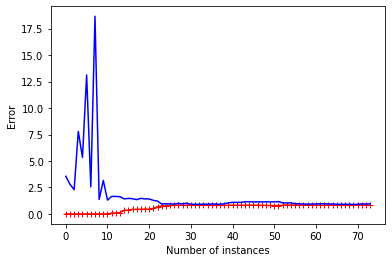

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10)),
                     ('lin_reg', LinearRegression()),
                     ])

learning_curves(polynomial_regression, X, y)

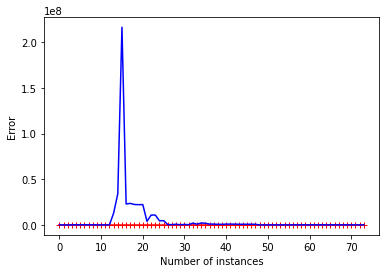

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=50)),
                     ('lin_reg', LinearRegression()),
                     ])

learning_curves(polynomial_regression, X, y)